In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
data=pd.read_csv("./Assignment2/data.csv")

In [3]:
data

,Age,Income,Gender,MaritialStatus,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [4]:
len(data)

14

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
inputs=data.drop('Buys', axis='columns')

In [7]:
inputs

,Age,Income,Gender,MaritialStatus
0,<21,High,Male,Single
1,<21,High,Male,Married
2,21-35,High,Male,Single
3,>35,Medium,Male,Single
4,>35,Low,Female,Single
5,>35,Low,Female,Married
6,21-35,Low,Female,Married
7,<21,Medium,Male,Single
8,<21,Low,Female,Married
9,>35,Medium,Female,Single


In [8]:
target=data['Buys']

In [9]:
target

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Buys, dtype: object

In [10]:
inputs

,Age,Income,Gender,MaritialStatus
0,<21,High,Male,Single
1,<21,High,Male,Married
2,21-35,High,Male,Single
3,>35,Medium,Male,Single
4,>35,Low,Female,Single
5,>35,Low,Female,Married
6,21-35,Low,Female,Married
7,<21,Medium,Male,Single
8,<21,Low,Female,Married
9,>35,Medium,Female,Single


In [11]:
le_age=LabelEncoder()
le_income=LabelEncoder()
le_gender=LabelEncoder()
le_maritalStatus=LabelEncoder()

In [12]:
inputs['Age_n']=le_age.fit_transform(inputs['Age'])
inputs['Income_n']=le_income.fit_transform(inputs['Income'])
inputs['Gender_n']=le_gender.fit_transform(inputs['Gender'])
inputs['MaritalStatus_n']=le_maritalStatus.fit_transform(inputs['MaritialStatus'])

In [13]:
inputs

,Age,Income,Gender,MaritialStatus,Age_n,Income_n,Gender_n,MaritalStatus_n
0,<21,High,Male,Single,1,0,1,1
1,<21,High,Male,Married,1,0,1,0
2,21-35,High,Male,Single,0,0,1,1
3,>35,Medium,Male,Single,2,2,1,1
4,>35,Low,Female,Single,2,1,0,1
5,>35,Low,Female,Married,2,1,0,0
6,21-35,Low,Female,Married,0,1,0,0
7,<21,Medium,Male,Single,1,2,1,1
8,<21,Low,Female,Married,1,1,0,0
9,>35,Medium,Female,Single,2,2,0,1


In [14]:
inputs=inputs.drop(['Age','Income','Gender','MaritialStatus'], axis='columns')

In [15]:
inputs

,Age_n,Income_n,Gender_n,MaritalStatus_n
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,0
6,0,1,0,0
7,1,2,1,1
8,1,1,0,0
9,2,2,0,1


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test, Y_train,Y_test=train_test_split(inputs, target, test_size=0.2, random_state=30)

In [18]:
X_train

,Age_n,Income_n,Gender_n,MaritalStatus_n
8,1,1,0,0
6,0,1,0,0
10,1,2,0,0
1,1,0,1,0
3,2,2,1,1
12,0,0,0,1
2,0,0,1,1
7,1,2,1,1
4,2,1,0,1
13,2,2,1,0


In [19]:
len(X_train)

11

In [20]:
len(Y_train)

11

In [21]:
X_test

,Age_n,Income_n,Gender_n,MaritalStatus_n
0,1,0,1,1
9,2,2,0,1
11,0,2,1,0


In [22]:
from sklearn import tree

In [23]:
model=tree.DecisionTreeClassifier()

In [24]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [25]:
model.score(X_test,Y_test)

1.0

In [26]:
# Query
query=np.array([1,1,0,0])
pred=model.predict([query])

In [27]:
pred

array(['Yes'], dtype=object)

[Text(111.60000000000001, 195.696, 'X[0] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(74.4, 152.208, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(148.8, 152.208, 'X[2] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(74.4, 108.72, 'X[0] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(37.2, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(111.60000000000001, 65.232, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(74.4, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(148.8, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.20000000000002, 108.72, 'X[3] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(186.0, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(260.40000000000003, 65.232, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(223.20000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(297.6, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

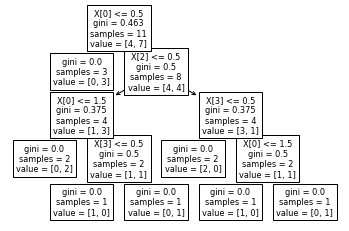

In [41]:
tree.plot_tree(model)

In [32]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, feature_names=X_train.columns)
graph=graphviz.Source(dot_data)
graph.render("data")

'data.pdf'

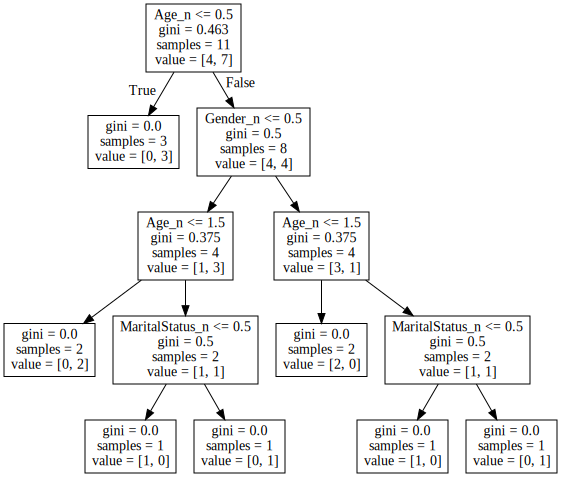

In [33]:
graph

## Attempt 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("./Assignment2/data.csv")

In [3]:
data

,Age,Income,Gender,MaritialStatus,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [4]:
le_age=LabelEncoder()
le_income=LabelEncoder()
le_gender=LabelEncoder()
le_maritialStatus=LabelEncoder()

In [5]:
data["Age_n"]=le_age.fit_transform(data["Age"])

In [6]:
data["Income_n"]=le_income.fit_transform(data["Income"])

In [7]:
data["Gender_n"]=le_gender.fit_transform(data["Gender"])

In [8]:
data["MaritialStatus_n"]=le_maritialStatus.fit_transform(data["MaritialStatus"])

In [9]:
data

,Age,Income,Gender,MaritialStatus,Buys,Age_n,Income_n,Gender_n,MaritialStatus_n
0,<21,High,Male,Single,No,1,0,1,1
1,<21,High,Male,Married,No,1,0,1,0
2,21-35,High,Male,Single,Yes,0,0,1,1
3,>35,Medium,Male,Single,Yes,2,2,1,1
4,>35,Low,Female,Single,Yes,2,1,0,1
5,>35,Low,Female,Married,No,2,1,0,0
6,21-35,Low,Female,Married,Yes,0,1,0,0
7,<21,Medium,Male,Single,No,1,2,1,1
8,<21,Low,Female,Married,Yes,1,1,0,0
9,>35,Medium,Female,Single,Yes,2,2,0,1


In [10]:
data.drop(["Age","Income","Gender","MaritialStatus"], axis="columns", inplace=True)

In [11]:
data

,Buys,Age_n,Income_n,Gender_n,MaritialStatus_n
0,No,1,0,1,1
1,No,1,0,1,0
2,Yes,0,0,1,1
3,Yes,2,2,1,1
4,Yes,2,1,0,1
5,No,2,1,0,0
6,Yes,0,1,0,0
7,No,1,2,1,1
8,Yes,1,1,0,0
9,Yes,2,2,0,1


In [12]:
X=data.drop("Buys", axis="columns")

In [13]:
X

,Age_n,Income_n,Gender_n,MaritialStatus_n
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,0
6,0,1,0,0
7,1,2,1,1
8,1,1,0,0
9,2,2,0,1


In [14]:
Y=data["Buys"]

In [15]:
Y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Buys, dtype: object

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25, random_state=42)

In [17]:
 len(X_train)

10

In [18]:
model=DecisionTreeClassifier()

In [19]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [20]:
model.score(X,Y)

0.9285714285714286

In [21]:
data

,Buys,Age_n,Income_n,Gender_n,MaritialStatus_n
0,No,1,0,1,1
1,No,1,0,1,0
2,Yes,0,0,1,1
3,Yes,2,2,1,1
4,Yes,2,1,0,1
5,No,2,1,0,0
6,Yes,0,1,0,0
7,No,1,2,1,1
8,Yes,1,1,0,0
9,Yes,2,2,0,1


In [22]:
query=[1,1,0,0]
model.predict([query])

array(['Yes'], dtype=object)

In [23]:
import graphviz
import sklearn.tree as tree

In [24]:
dot_data=tree.export_graphviz(model, out_file=None, feature_names=X_train.columns)

In [25]:
graph=graphviz.Source(dot_data)

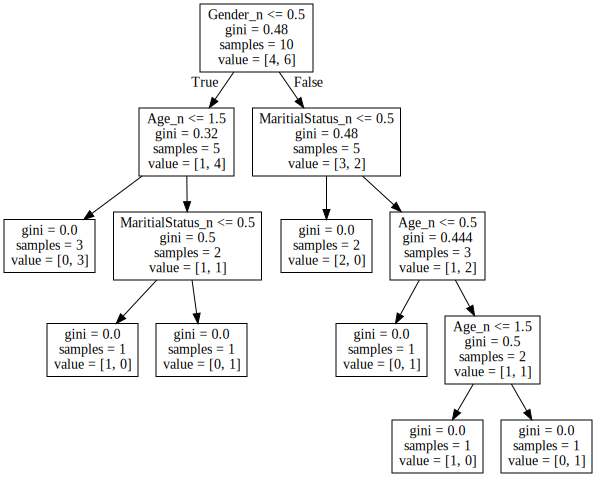

In [26]:
graph